# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, model_selection
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
classes_df = pd.read_csv('../Lab2/first_sample.csv')
classes_df

,x,y,class
0,-1.503286,-2.138264,0
1,-1.352311,-0.476970,0
2,-2.234153,-2.234137,0
3,-0.420787,-1.232565,0
4,-2.469474,-1.457440,0
...,...,...,...
995,2.800410,2.754291,1
996,3.188913,2.708304,1
997,2.351448,3.070150,1
998,1.973479,1.118125,1


SVM Accuracy: 99.67%


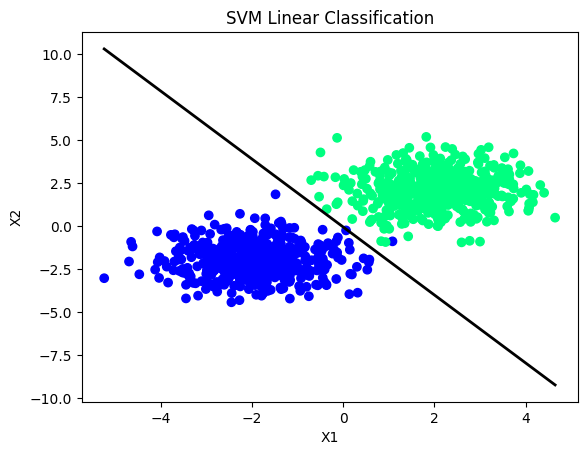

In [3]:
X = classes_df[['x', 'y']].values
y = classes_df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_model = svm.SVC(kernel='linear')

svm_model.fit(X_train, y_train)

class_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, class_pred)

print(f"SVM Accuracy: {accuracy * 100:.2f}%")


w = svm_model.coef_[0]
b = svm_model.intercept_[0]

def decision_boundary(x):
    return (-w[0] * x - b) / w[1]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

x_values = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
plt.plot(x_values, decision_boundary(x_values), 'k-', lw=2)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Linear Classification')

plt.show()

k=1 99.86% (+/- 0.43)
k=2 99.71% (+/- 0.57)
k=3 99.57% (+/- 0.65)
k=4 99.57% (+/- 0.65)
k=5 99.57% (+/- 0.65)
k=6 99.57% (+/- 0.65)
k=7 99.57% (+/- 0.65)
k=8 99.57% (+/- 0.65)
k=9 99.86% (+/- 0.43)
k=10 99.57% (+/- 0.65)
k=11 99.71% (+/- 0.57)
k=12 99.57% (+/- 0.65)
k=13 99.71% (+/- 0.57)
k=14 99.71% (+/- 0.57)
k=15 99.71% (+/- 0.57)
k=16 99.57% (+/- 0.65)
k=17 99.57% (+/- 0.65)
k=18 99.57% (+/- 0.65)
k=19 99.71% (+/- 0.57)
k=20 99.71% (+/- 0.57)
k=21 99.86% (+/- 0.43)
k=22 99.71% (+/- 0.57)
k=23 99.86% (+/- 0.43)
k=24 99.71% (+/- 0.57)
The optimal number of neighbors is 1 with 99.86% accuracy
Accuracy on test data: 99.67%
Classification Report (test):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       150
           1       0.99      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



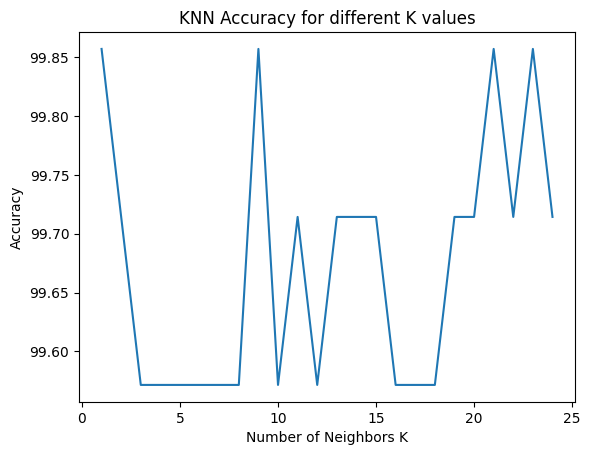

In [4]:
X = classes_df[['x', 'y']]  
y = classes_df['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

neighbors = np.arange(1, 25)  
cv_scores = []
k_fold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean() * 100)
    print(f"k={k} {scores.mean()*100:.2f}% (+/- {scores.std()*100:.2f})")


optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print(f"The optimal number of neighbors is {optimal_k} with {max(cv_scores):.2f}% accuracy")


knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

y_test_pred = knn.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on test data: {accuracy_test * 100:.2f}%')

print(f'Classification Report (test):')
print(classification_report(y_test, y_test_pred))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different K values')
plt.show()

In [5]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)

[[149   1]
 [  0 150]]
100.0


Random Forest Accuracy: 99.67%


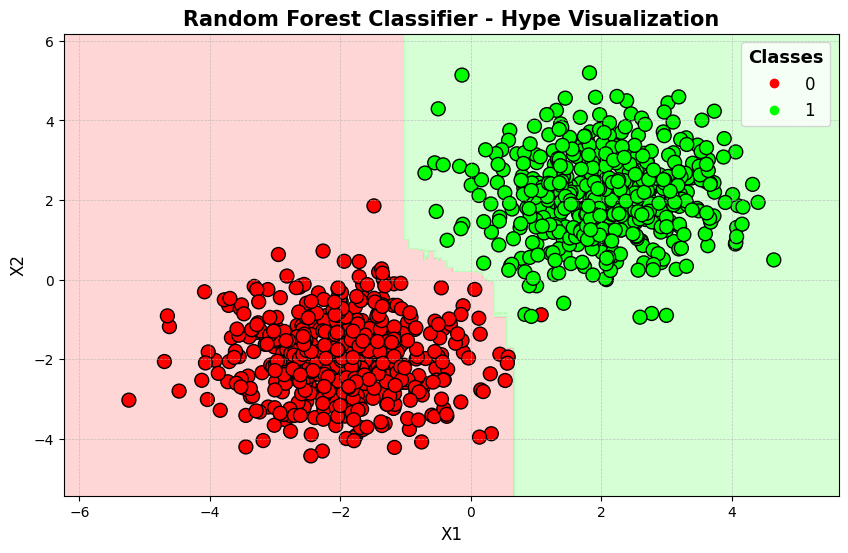

In [6]:
X = classes_df[['x', 'y']].values
y = classes_df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

class_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, class_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = rf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB'])
cmap_bold = ['#FF0000', '#00FF00']

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=100)

plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.title('Random Forest Classifier - Hype Visualization', fontsize=15, weight='bold')

legend1 = plt.legend(*scatter.legend_elements(), title="Classes", loc='upper right', fontsize=12, fancybox=True)
plt.setp(legend1.get_title(), fontsize=13, weight='bold')

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()

**Аналіз отриманих результатів**:

Всі моделі були натреновані в базовій конфігурації без **fine тюнингу**. \
В першому сеті даних, який є лінійно роздільний, я застосував не тільки лінійно роздільні моделі. Це були **SVM**, **KNN** та **Random Forest**. Після базового тренування цих моделей, я отримав такі результати:
- SVM Accuracy: 99.67%
- KNN Accuracy: 99.86%, Optimal K-neighbours numbers is 1
- Random Forest Accuracy: 99.67%

В цілому, всі моделі показали майже найвищий можливий результат, тому для датасету з 2 лінійно роздільними класами підійде будь-яка з підібраних моделей (з коробки).


**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


In [7]:
three_classes_df = pd.read_csv('../Lab2/second_sample.csv')
three_classes_df

,x,y,class
0,3.915614,1.414714,0
1,1.883692,1.743084,0
2,2.847048,4.056491,0
3,-0.456349,3.859081,0
4,3.148347,2.786029,0
...,...,...,...
895,1.903979,-4.246262,2
896,2.822445,-0.290975,2
897,3.045788,-3.157630,2
898,2.379827,-1.286015,2


SVM Accuracy: 98.52%


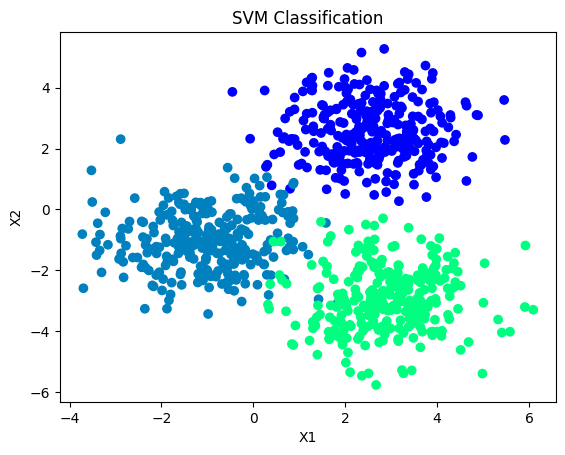

In [23]:
X = three_classes_df[['x', 'y']].values
y = three_classes_df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_model = svm.SVC(kernel='linear')

svm_model.fit(X_train, y_train)

class_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, class_pred)

print(f"SVM Accuracy: {accuracy * 100:.2f}%")


w = svm_model.coef_[0]
b = svm_model.intercept_[0]

def decision_boundary(x):
    return (-w[0] * x - b) / w[1]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Classification')

plt.show()

Random Forest Accuracy: 98.15%


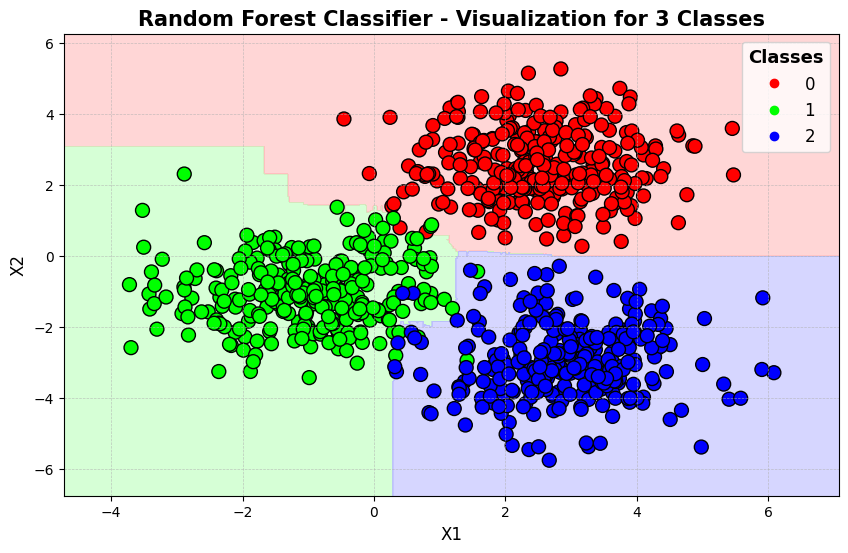

In [25]:
X = three_classes_df[['x', 'y']].values
y = three_classes_df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

class_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, class_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = rf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
cmap_bold = ['#FF0000', '#00FF00', '#0000FF'] 

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=100)

plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.title('Random Forest Classifier - Visualization for 3 Classes', fontsize=15, weight='bold')

legend1 = plt.legend(*scatter.legend_elements(), title="Classes", loc='upper right', fontsize=12, fancybox=True)
plt.setp(legend1.get_title(), fontsize=13, weight='bold')

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()

Decision Tree Accuracy: 97.04%


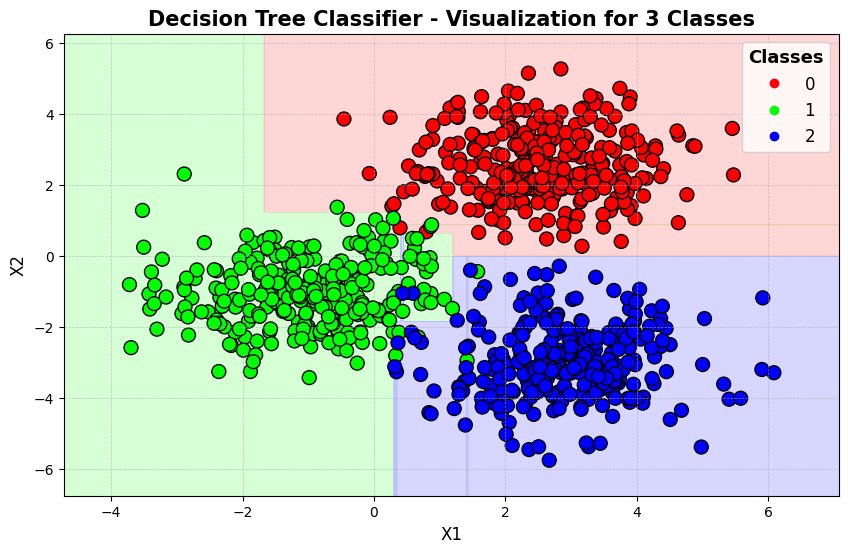

In [27]:
X = three_classes_df[['x', 'y']].values
y = three_classes_df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

class_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, class_pred)
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = dt_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF']) 
cmap_bold = ['#FF0000', '#00FF00', '#0000FF']

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=100)

plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.title('Decision Tree Classifier - Visualization for 3 Classes', fontsize=15, weight='bold')

legend1 = plt.legend(*scatter.legend_elements(), title="Classes", loc='upper right', fontsize=12, fancybox=True)
plt.setp(legend1.get_title(), fontsize=13, weight='bold')

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()

`**Аналіз отриманих результатів**:

Всі моделі були натреновані в базовій конфігурації без **fine тюнингу**. \
В цьому сеті даних, який вже є НЕ лінійно роздільним, я використав такі моделі: **SVM**, **Random Forest** та **Decision Tree**. На цей раз, я вирішив провести маленький експеримент. Спочатку я натренував ансамбль модель **Random Forest**, який всередині має **100** рандомно сконфігурованих **Decision Tree**. І далі, я взяв сам **Decision Tree**, але тільки один екземпляр. І якощ порівнювати, то ансамбль, як і очікувалось справився краще, чим тількі одна модель. І після тренування цих моделей, я отримав такі результати:
- SVM Accuracy: 98.52%
- Random Forest Accuracy: 98.15%
- Decision Tree Accuracy: 97.04%

Знову ж таки, всі моделі показали непоганий результат, але найкраще справились **SVM** та **Random Forest**.`

**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

In [29]:
tor_df = pd.read_csv('../Lab2/third_sample.csv')
tor_df

,x,y,class
0,-3.422732,1.425742,0
1,2.400968,0.523406,0
2,2.551898,0.856651,0
3,1.001819,-2.422569,0
4,-2.013599,2.452890,0
...,...,...,...
995,-0.288260,-5.501961,1
996,5.788110,2.917210,1
997,-3.989153,-4.525293,1
998,2.834269,4.908974,1


Random Forest Accuracy: 99.00%


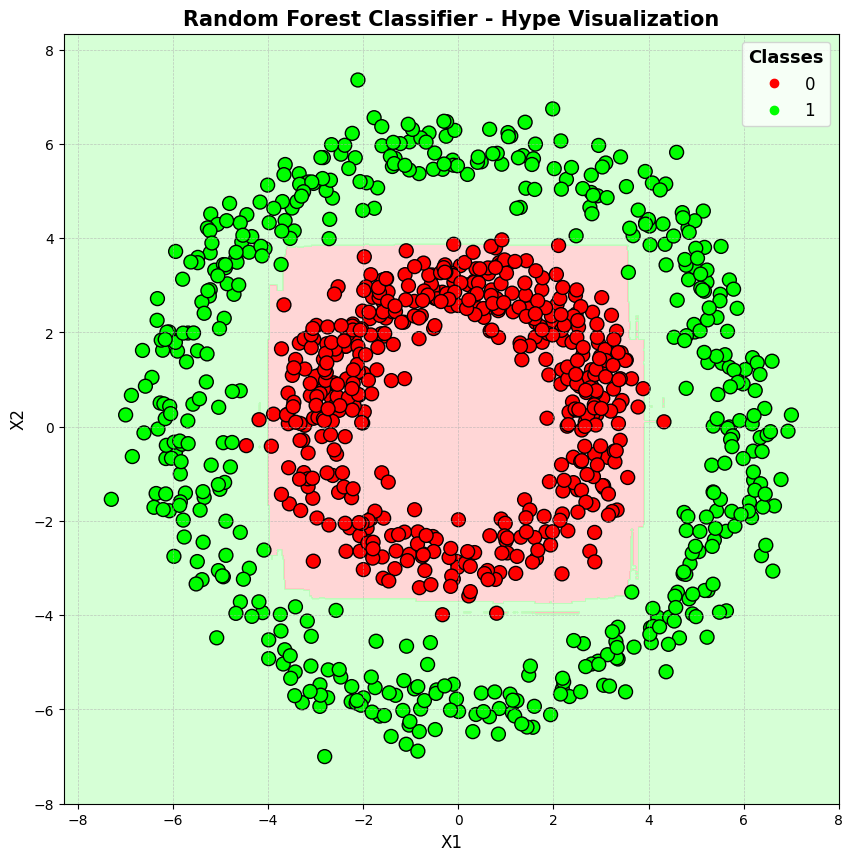

In [32]:
X = tor_df[['x', 'y']].values
y = tor_df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

class_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, class_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = rf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 10))
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB'])
cmap_bold = ['#FF0000', '#00FF00']

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=100)

plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.title('Random Forest Classifier - Tor Visualization', fontsize=15, weight='bold')

legend1 = plt.legend(*scatter.legend_elements(), title="Classes", loc='upper right', fontsize=12, fancybox=True)
plt.setp(legend1.get_title(), fontsize=13, weight='bold')

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()

k=1 99.43% (+/- 0.95)
k=2 99.71% (+/- 0.57)
k=3 100.00% (+/- 0.00)
k=4 99.71% (+/- 0.57)
k=5 99.86% (+/- 0.43)
k=6 99.86% (+/- 0.43)
k=7 100.00% (+/- 0.00)
k=8 99.86% (+/- 0.43)
k=9 99.86% (+/- 0.43)
k=10 99.86% (+/- 0.43)
k=11 100.00% (+/- 0.00)
k=12 100.00% (+/- 0.00)
k=13 100.00% (+/- 0.00)
k=14 100.00% (+/- 0.00)
k=15 100.00% (+/- 0.00)
k=16 100.00% (+/- 0.00)
k=17 100.00% (+/- 0.00)
k=18 100.00% (+/- 0.00)
k=19 100.00% (+/- 0.00)
k=20 100.00% (+/- 0.00)
k=21 100.00% (+/- 0.00)
k=22 99.86% (+/- 0.43)
k=23 100.00% (+/- 0.00)
k=24 99.86% (+/- 0.43)
The optimal number of neighbors is 3 with 100.00% accuracy
Accuracy on test data: 99.67%
Classification Report (test):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       150
           1       0.99      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       30

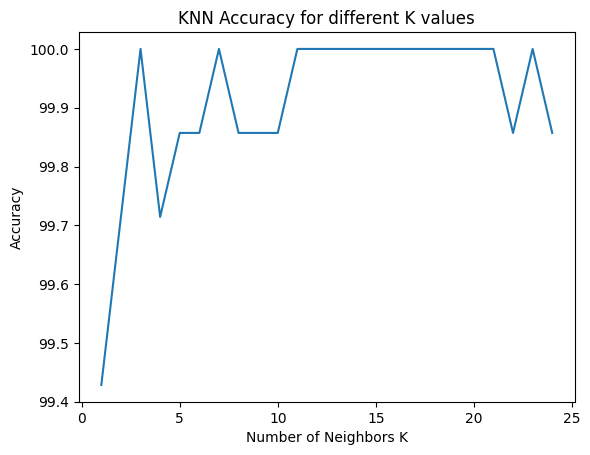

In [33]:
X = tor_df[['x', 'y']]  
y = tor_df['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

neighbors = np.arange(1, 25)  
cv_scores = []
k_fold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean() * 100)
    print(f"k={k} {scores.mean()*100:.2f}% (+/- {scores.std()*100:.2f})")


optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print(f"The optimal number of neighbors is {optimal_k} with {max(cv_scores):.2f}% accuracy")


knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

y_test_pred = knn.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on test data: {accuracy_test * 100:.2f}%')

print(f'Classification Report (test):')
print(classification_report(y_test, y_test_pred))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different K values')
plt.show()

In [34]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)

[[149   1]
 [  0 150]]
100.0


SVM Accuracy: 54.00%


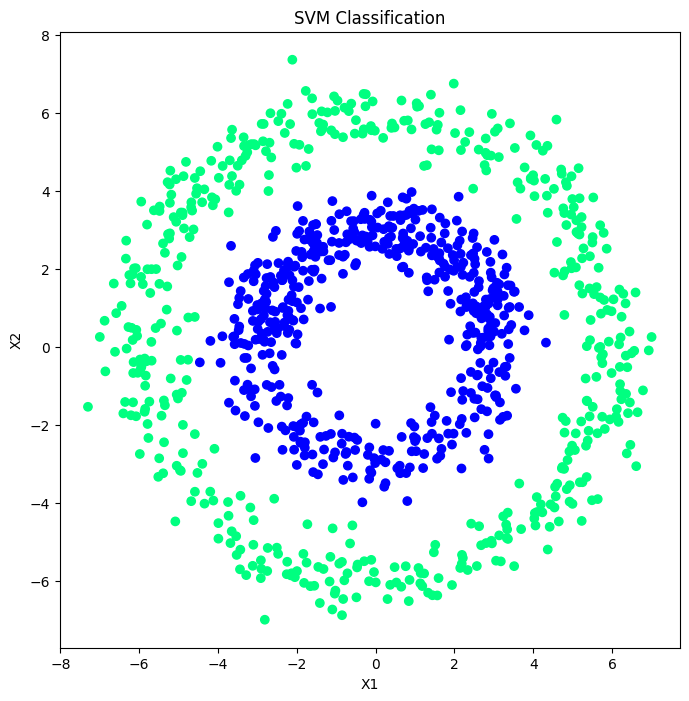

In [37]:
X = tor_df[['x', 'y']].values
y = tor_df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_model = svm.SVC(kernel='linear')

svm_model.fit(X_train, y_train)

class_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, class_pred)

print(f"SVM Accuracy: {accuracy * 100:.2f}%")


w = svm_model.coef_[0]
b = svm_model.intercept_[0]

def decision_boundary(x):
    return (-w[0] * x - b) / w[1]

plt.figure(figsize=(8, 8))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Classification')

plt.show()

**Аналіз отриманих результатів**:

Всі моделі були натреновані в базовій конфігурації без **fine тюнингу**. \
В цьому сеті даних, який також є НЕ лінійно роздільним, я використав такі моделі: **SVM**, **Random Forest** та **KNN**. Результати:
- Random Forest Accuracy: 99.00%
- KNN Accuracy: 100.00%, Optimal K-Neighbours number is 3
- SVM Accuracy: 54.00%

В цьому випадку найкраще справились можелі **Random Forest** та **KNN**. А ось **SVM** показала жахливий результат в **54%** точності.

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

In [38]:
spiral_df = pd.read_csv('../Lab2/double_spiral_sample.csv')
spiral_df

,x,y,class
0,0.424684,0.013845,0
1,-0.300411,-0.154318,0
2,-0.134590,0.184413,0
3,-0.151741,-0.406277,0
4,0.204336,-0.261276,0
...,...,...,...
995,-12.283422,0.932142,1
996,-12.265419,1.579902,1
997,-12.494027,0.736097,1
998,-12.765432,0.008256,1


SVM Accuracy: 48.33%


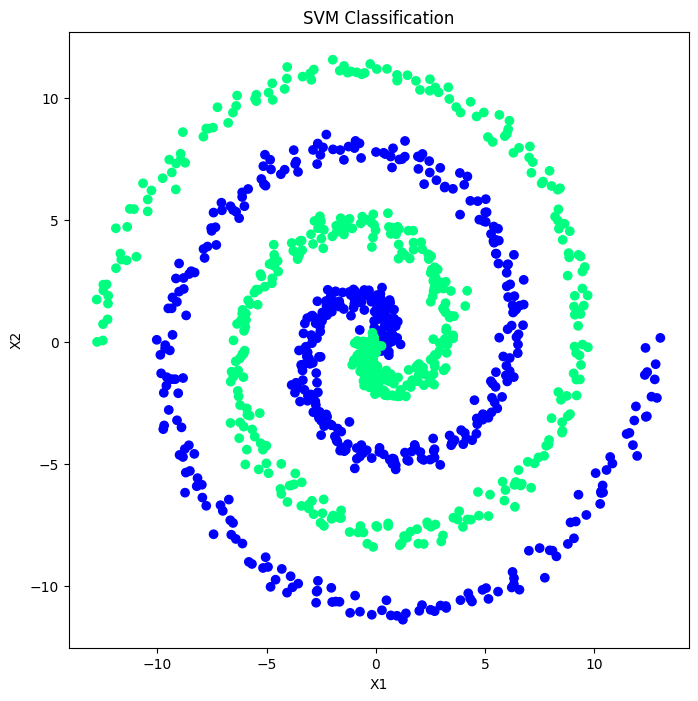

In [39]:
X = spiral_df[['x', 'y']].values
y = spiral_df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_model = svm.SVC(kernel='linear')

svm_model.fit(X_train, y_train)

class_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, class_pred)

print(f"SVM Accuracy: {accuracy * 100:.2f}%")


w = svm_model.coef_[0]
b = svm_model.intercept_[0]

def decision_boundary(x):
    return (-w[0] * x - b) / w[1]

plt.figure(figsize=(8, 8))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Classification')

plt.show()

Random Forest Accuracy: 95.67%


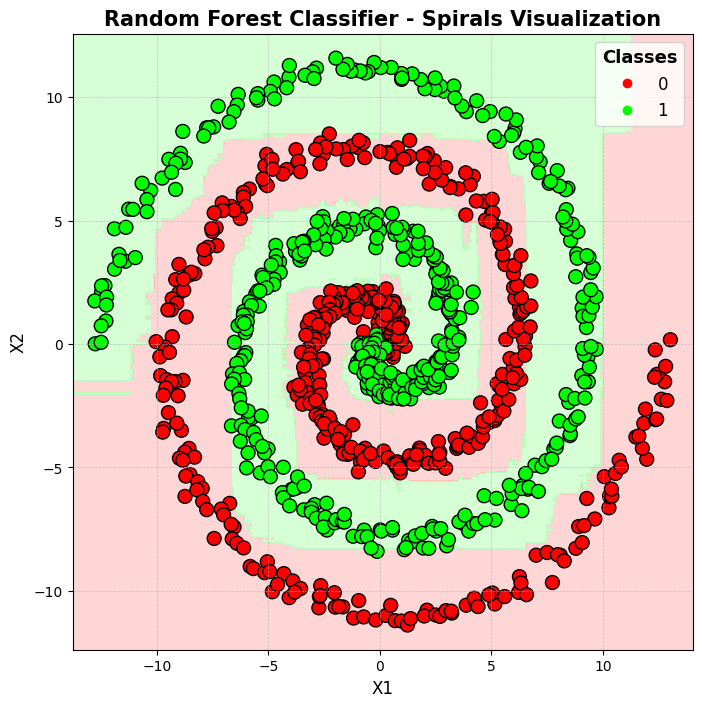

In [41]:
X = spiral_df[['x', 'y']].values
y = spiral_df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

class_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, class_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = rf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 8))
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB'])
cmap_bold = ['#FF0000', '#00FF00']

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=100)

plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.title('Random Forest Classifier - Spirals Visualization', fontsize=15, weight='bold')

legend1 = plt.legend(*scatter.legend_elements(), title="Classes", loc='upper right', fontsize=12, fancybox=True)
plt.setp(legend1.get_title(), fontsize=13, weight='bold')

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()

Logistic Regression with Polynomial Features Accuracy: 56.67%


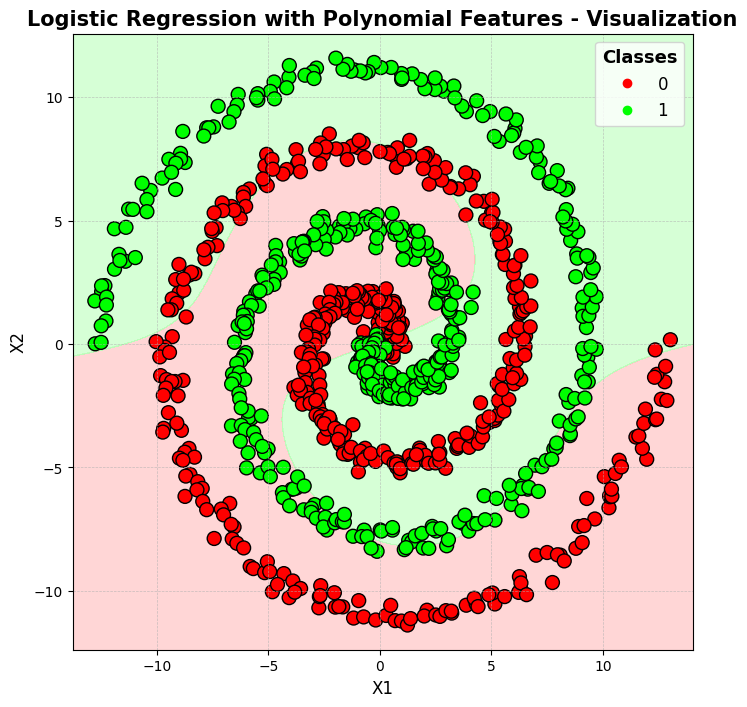

In [45]:
X = spiral_df[['x', 'y']].values
y = spiral_df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg_model = make_pipeline(PolynomialFeatures(degree=3), LogisticRegression())

log_reg_model.fit(X_train, y_train)

class_pred = log_reg_model.predict(X_test)

accuracy = accuracy_score(y_test, class_pred)
print(f"Logistic Regression with Polynomial Features Accuracy: {accuracy * 100:.2f}%")

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = log_reg_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 8))
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB'])
cmap_bold = ['#FF0000', '#00FF00'] 

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=100)

plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.title('Logistic Regression with Polynomial Features', fontsize=15, weight='bold')

legend1 = plt.legend(*scatter.legend_elements(), title="Classes", loc='upper right', fontsize=12, fancybox=True)
plt.setp(legend1.get_title(), fontsize=13, weight='bold')

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()

**Аналіз отриманих результатів**:

Всі моделі були натреновані в базовій конфігурації без **fine тюнингу**. \
Цей датасет мабуть є найскладнішим, для завдання класифікації. Тут я використав такі моделі: **SVM**, **Random Forest** та вирішив ще спробувати **Linear Regression with Polynomial Features**. Результати вийшли такими:
- SVM Accuracy: 48.33%
- Random Forest Accuracy: 95.67%
- Linear Regression with Polynomial Features Accuracy: 56.67%

І в останньому завданні, як і очікувалось найкращий результат показала ансамблева модель **Random Forest** з результатом **95%**. А ось **SVM** та **Лінійна регресія** в цьому випадку показали в середньому **50%**, що є поганим результатом. це звісно не дуже хороший приклад використання Лінійної Регресії, але було цікаво спробувати, який вона покаже результат.